In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler



In [2]:
# Load the dataset
file_path = "Disease_symptom_and_patient_profile_dataset.csv"
df = pd.read_csv(file_path)




In [3]:
# Check first few rows
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [5]:
# Checking for missing values

df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [6]:
# Standardizing categorical values
df = df.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [7]:
# shape of the dataset
df.shape

(349, 10)

In [8]:
# Standardizing categorical values
df = df.map(lambda x: x.strip().lower() if isinstance(x, str) else x)

In [9]:
# Function to categorize columns
def identify_column_types(dataframe, cat_threshold=10, high_card_threshold=20):
    """
    Classifies columns into categorical, numerical, and high-cardinality categorical types.
    """
    categorical_columns = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    numeric_as_category = [col for col in dataframe.columns if dataframe[col].nunique() < cat_threshold and dataframe[col].dtypes != "O"]
    high_cardinality_cats = [col for col in dataframe.columns if dataframe[col].nunique() > high_card_threshold and dataframe[col].dtypes == "O"]
    
    categorical_columns.extend(numeric_as_category)
    categorical_columns = [col for col in categorical_columns if col not in high_cardinality_cats]
    
    numerical_columns = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    numerical_columns = [col for col in numerical_columns if col not in numeric_as_category]
    
    print(f"Total Observations: {dataframe.shape[0]}")
    print(f"Total Variables: {dataframe.shape[1]}")
    print(f"Categorical Columns: {len(categorical_columns)}")
    print(f"Numerical Columns: {len(numerical_columns)}")
    print(f"High Cardinality Categorical Columns: {len(high_cardinality_cats)}")
    print(f"Numerical but Categorical Columns: {len(numeric_as_category)}")

    print("High Cardinality Columns:", high_cardinality_cats) 
    
    return categorical_columns, numerical_columns, high_cardinality_cats

# Get categorized column lists
cat_features, num_features, high_cardinality_features = identify_column_types(df)


Total Observations: 349
Total Variables: 10
Categorical Columns: 8
Numerical Columns: 1
High Cardinality Categorical Columns: 1
Numerical but Categorical Columns: 0
High Cardinality Columns: ['Disease']


In [10]:
# checking the features with high unique values

print(df['Disease'].unique())
print(df['Disease'].nunique())

['influenza' 'common cold' 'eczema' 'asthma' 'hyperthyroidism'
 'allergic rhinitis' 'anxiety disorders' 'diabetes' 'gastroenteritis'
 'pancreatitis' 'rheumatoid arthritis' 'depression' 'liver cancer'
 'stroke' 'urinary tract infection' 'dengue fever' 'hepatitis'
 'kidney cancer' 'migraine' 'muscular dystrophy' 'sinusitis'
 'ulcerative colitis' 'bipolar disorder' 'bronchitis' 'cerebral palsy'
 'colorectal cancer' 'hypertensive heart disease' 'multiple sclerosis'
 'myocardial infarction (heart...' 'urinary tract infection (uti)'
 'osteoporosis' 'pneumonia' 'atherosclerosis'
 'chronic obstructive pulmonary...' 'epilepsy' 'hypertension'
 'obsessive-compulsive disorde...' 'psoriasis' 'rubella' 'cirrhosis'
 'conjunctivitis (pink eye)' 'liver disease' 'malaria' 'spina bifida'
 'kidney disease' 'osteoarthritis' 'klinefelter syndrome' 'acne'
 'brain tumor' 'cystic fibrosis' 'glaucoma' 'rabies' 'chickenpox'
 'coronary artery disease' 'eating disorders (anorexia,...' 'fibromyalgia'
 'hemophilia' 

**EDA**

       Fever  Percentage
Fever                   
yes      175   50.143266
no       174   49.856734


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


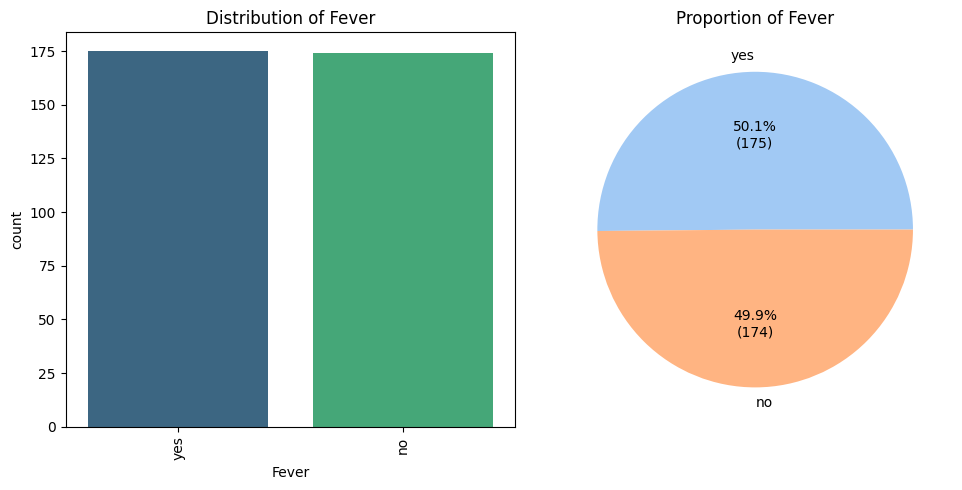

       Cough  Percentage
Cough                   
no       182   52.148997
yes      167   47.851003


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


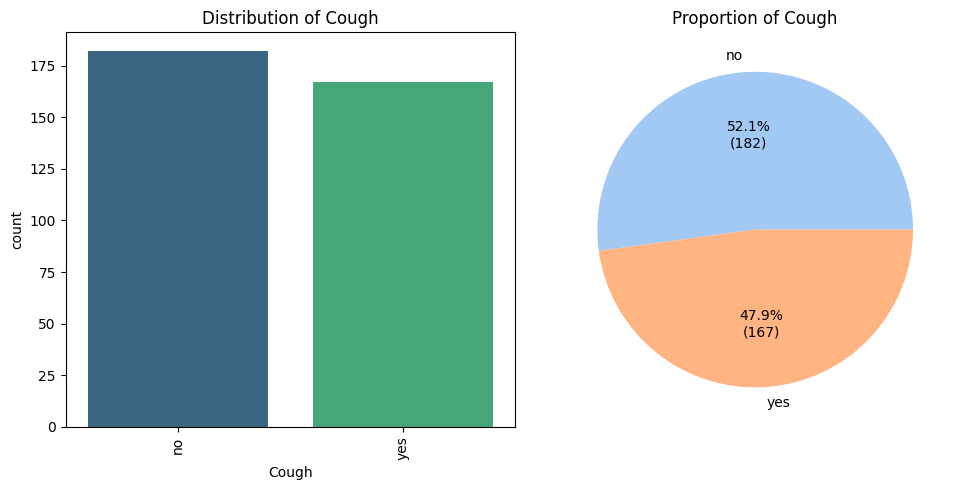

         Fatigue  Percentage
Fatigue                     
yes          242   69.340974
no           107   30.659026


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


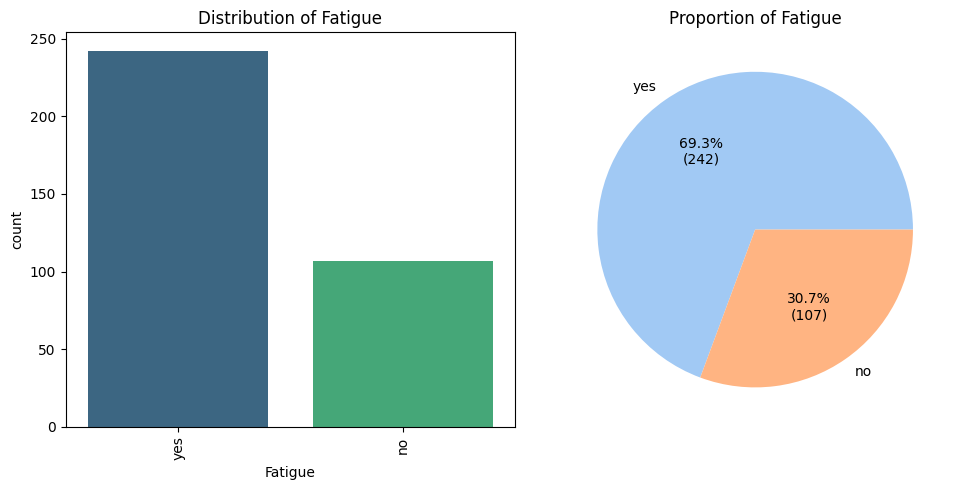

                      Difficulty Breathing  Percentage
Difficulty Breathing                                  
no                                     261     74.7851
yes                                     88     25.2149


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


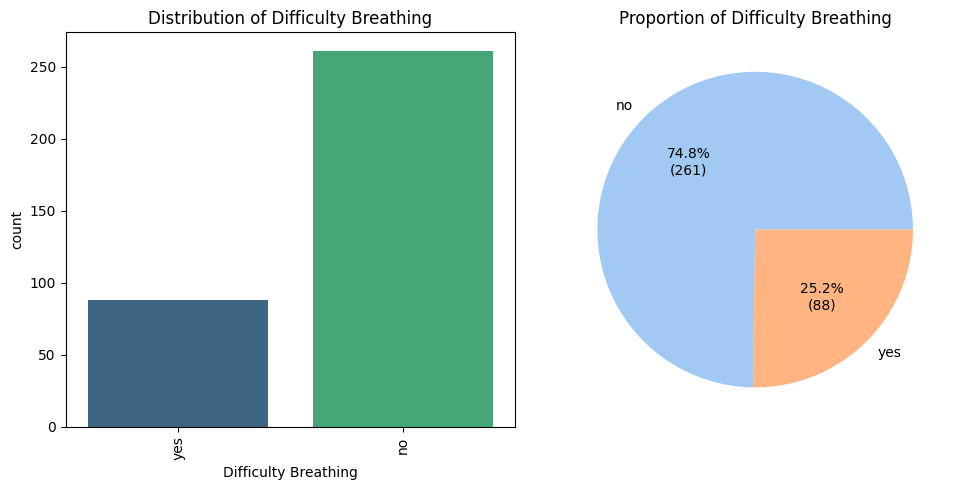

        Gender  Percentage
Gender                    
female     176   50.429799
male       173   49.570201


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


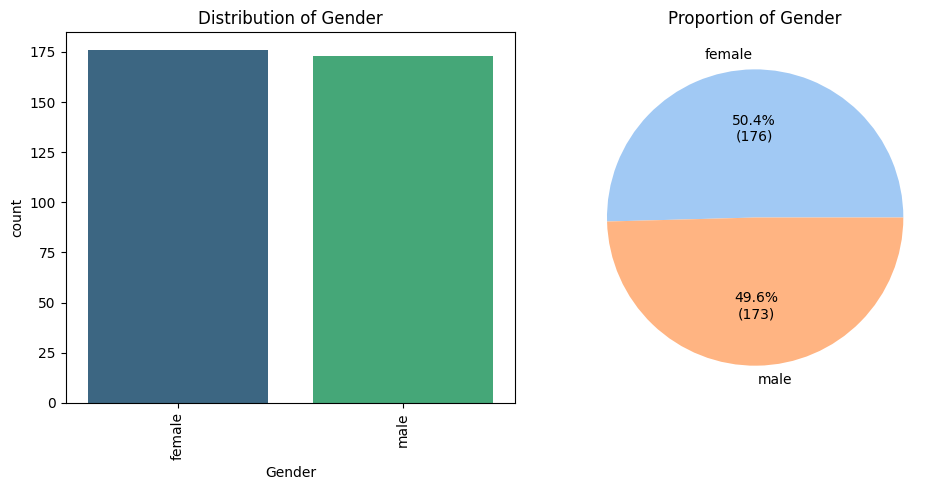

                Blood Pressure  Percentage
Blood Pressure                            
high                       167   47.851003
normal                     164   46.991404
low                         18    5.157593


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


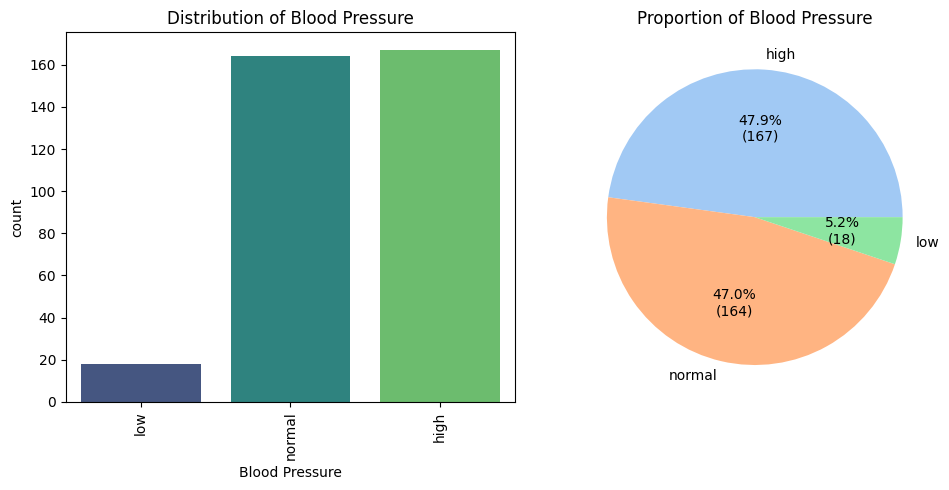

                   Cholesterol Level  Percentage
Cholesterol Level                               
high                             166    47.56447
normal                           149    42.69341
low                               34     9.74212


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


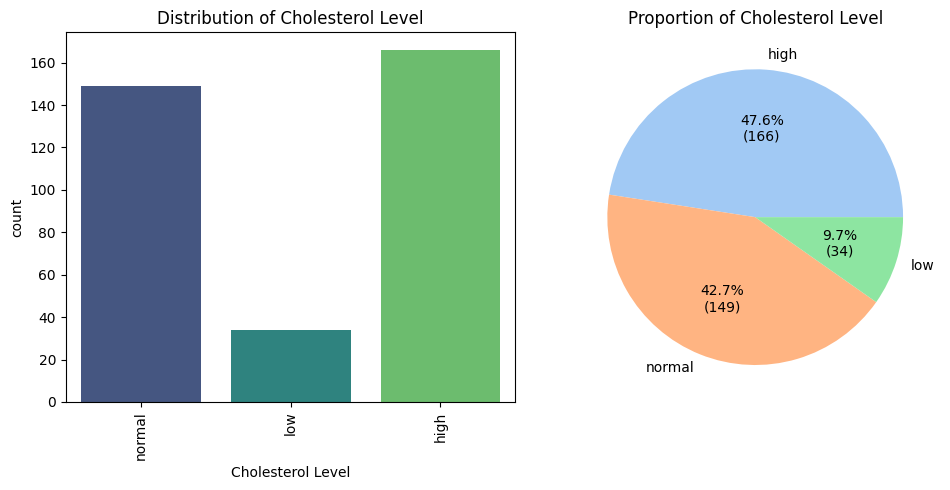

                  Outcome Variable  Percentage
Outcome Variable                              
positive                       186   53.295129
negative                       163   46.704871


C:\Users\DELL\AppData\Local\Temp\ipykernel_25068\1956246241.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[column], data=df, palette="viridis")


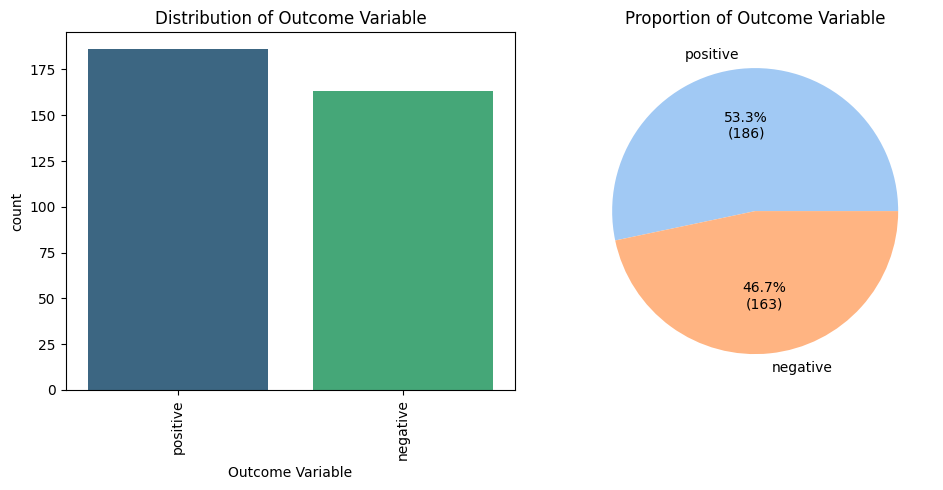

In [11]:
# Exploratory Data Analysis
for column in cat_features:
    print(pd.DataFrame({
        column: df[column].value_counts(),
        "Percentage": 100 * df[column].value_counts() / len(df)
    }))
    
    plt.figure(figsize=(10, 5))
    
    # Countplot with different colors
    plt.subplot(1, 2, 1)
    sns.countplot(x=df[column], data=df, palette="viridis")
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=90)
    
    # Pie chart
    plt.subplot(1, 2, 2)
    counts = df[column].value_counts()
    plt.pie(counts, labels=counts.index, autopct=lambda p: f'{p:.1f}%\n({p/100*sum(counts):.0f})', colors=sns.color_palette("pastel"))
    plt.title(f"Proportion of {column}")
    
    plt.tight_layout()
    plt.show()

**Feature Extraction**

In [12]:
df['Disease'].value_counts()

Disease
asthma               23
stroke               16
osteoporosis         14
diabetes             10
hypertension         10
                     ..
schizophrenia         1
gout                  1
testicular cancer     1
tonsillitis           1
williams syndrome     1
Name: count, Length: 116, dtype: int64

In [13]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,influenza,yes,no,yes,yes,19,female,low,normal,positive
1,common cold,no,yes,yes,no,25,female,normal,normal,negative
2,eczema,no,yes,yes,no,25,female,normal,normal,negative
3,asthma,yes,yes,no,yes,25,male,normal,normal,positive
4,asthma,yes,yes,no,yes,25,male,normal,normal,positive


In [14]:
# Symptom Severity Score
df["symptom_severity_score"] = df[["Fever", "Cough", "Fatigue", "Difficulty Breathing"]].apply(lambda x: sum(x == "yes"), axis=1)

# "severity_level" to categorize the scores
df["severity_level"] = df["symptom_severity_score"].apply(lambda x: "Low" if x <= 1 else "Moderate" if x == 2 else "High")


In [15]:
df.head()

"""
Feature Engineering:
1. Symptom Severity Score: Calculates the total number of symptoms reported.
2. Age Group Binning: Categorizes patients into different age groups.
3. Risk Score: Computes risk based on age, blood pressure, and cholesterol levels.
4. Risk Level Classification: Categorizes the risk score into Low, Moderate, or High.
"""

'\nFeature Engineering:\n1. Symptom Severity Score: Calculates the total number of symptoms reported.\n2. Age Group Binning: Categorizes patients into different age groups.\n3. Risk Score: Computes risk based on age, blood pressure, and cholesterol levels.\n4. Risk Level Classification: Categorizes the risk score into Low, Moderate, or High.\n'

In [16]:
# Age group binning

bins = [0, 18, 65, float('inf')]
labels = ['Child', 'Adult', 'Senior']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


In [18]:
# Risk Score
df['Risk_Score'] = df['Age'] * 0.1 + (df['Cholesterol Level'] == 'High') * 10


In [19]:
# Risk Score Classification

def classify_risk(score):
    """
    Categorizes the risk score into Low, Moderate, or High.
    
    Parameters:
    score (float): The calculated risk score.
    
    Returns:
    str: The risk category (Low, Moderate, High).
    """
    if score < 5:
        return "Low"
    elif 5 <= score < 10:
        return "Moderate"
    else:
        return "High"

df['Risk_Level'] = df['Risk_Score'].apply(classify_risk)

In [20]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,symptom_severity_score,severity_level,Age_Group,Risk_Score,Risk_Level
0,influenza,yes,no,yes,yes,19,female,low,normal,positive,3,High,Adult,1.9,Low
1,common cold,no,yes,yes,no,25,female,normal,normal,negative,2,Moderate,Adult,2.5,Low
2,eczema,no,yes,yes,no,25,female,normal,normal,negative,2,Moderate,Adult,2.5,Low
3,asthma,yes,yes,no,yes,25,male,normal,normal,positive,3,High,Adult,2.5,Low
4,asthma,yes,yes,no,yes,25,male,normal,normal,positive,3,High,Adult,2.5,Low


**Encoding Features**

In [21]:
# One-Hot Encoding 

new_df = pd.get_dummies(df,columns=['Fever','Cough','Fatigue','Difficulty Breathing','Blood Pressure','Cholesterol Level','Gender','Age_Group'],drop_first=True)


# Convert only Boolean columns to integers
bool_cols = new_df.select_dtypes(include=['bool']).columns  
new_df[bool_cols] = new_df[bool_cols].astype(int)  




In [22]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disease                   349 non-null    object 
 1   Age                       349 non-null    int64  
 2   Outcome Variable          349 non-null    object 
 3   symptom_severity_score    349 non-null    int64  
 4   severity_level            349 non-null    object 
 5   Risk_Score                349 non-null    float64
 6   Risk_Level                349 non-null    object 
 7   Fever_yes                 349 non-null    int64  
 8   Cough_yes                 349 non-null    int64  
 9   Fatigue_yes               349 non-null    int64  
 10  Difficulty Breathing_yes  349 non-null    int64  
 11  Blood Pressure_low        349 non-null    int64  
 12  Blood Pressure_normal     349 non-null    int64  
 13  Cholesterol Level_low     349 non-null    int64  
 14  Cholestero

In [23]:
new_df.head()

,Disease,Age,Outcome Variable,symptom_severity_score,severity_level,Risk_Score,Risk_Level,Fever_yes,Cough_yes,Fatigue_yes,Difficulty Breathing_yes,Blood Pressure_low,Blood Pressure_normal,Cholesterol Level_low,Cholesterol Level_normal,Gender_male,Age_Group_Adult,Age_Group_Senior
0,influenza,19,positive,3,High,1.9,Low,1,0,1,1,1,0,0,1,0,1,0
1,common cold,25,negative,2,Moderate,2.5,Low,0,1,1,0,0,1,0,1,0,1,0
2,eczema,25,negative,2,Moderate,2.5,Low,0,1,1,0,0,1,0,1,0,1,0
3,asthma,25,positive,3,High,2.5,Low,1,1,0,1,0,1,0,1,1,1,0
4,asthma,25,positive,3,High,2.5,Low,1,1,0,1,0,1,0,1,1,1,0


In [24]:
new_df.shape

(349, 18)

In [25]:
new_df.columns.values

array(['Disease', 'Age', 'Outcome Variable', 'symptom_severity_score',
       'severity_level', 'Risk_Score', 'Risk_Level', 'Fever_yes',
       'Cough_yes', 'Fatigue_yes', 'Difficulty Breathing_yes',
       'Blood Pressure_low', 'Blood Pressure_normal',
       'Cholesterol Level_low', 'Cholesterol Level_normal', 'Gender_male',
       'Age_Group_Adult', 'Age_Group_Senior'], dtype=object)

In [26]:
# Rename the target variable as 'Results'

new_df.rename(columns={"Outcome Variable": "Results"}, inplace=True)


In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Disease                   349 non-null    object 
 1   Age                       349 non-null    int64  
 2   Results                   349 non-null    object 
 3   symptom_severity_score    349 non-null    int64  
 4   severity_level            349 non-null    object 
 5   Risk_Score                349 non-null    float64
 6   Risk_Level                349 non-null    object 
 7   Fever_yes                 349 non-null    int64  
 8   Cough_yes                 349 non-null    int64  
 9   Fatigue_yes               349 non-null    int64  
 10  Difficulty Breathing_yes  349 non-null    int64  
 11  Blood Pressure_low        349 non-null    int64  
 12  Blood Pressure_normal     349 non-null    int64  
 13  Cholesterol Level_low     349 non-null    int64  
 14  Cholestero

In [28]:
# Encode the categorical feature

cols_encode=['Results', 'severity_level', 'Risk_Level']


# Initialize and apply LabelEncoder
label_encoders = {}
for col in cols_encode:
    le = LabelEncoder()
    new_df[col] = le.fit_transform(new_df[col])  # Transform the column
    label_encoders[col] = le  # Store the encoder if needed for inverse transformation later


In [29]:
new_df.head()

,Disease,Age,Results,symptom_severity_score,severity_level,Risk_Score,Risk_Level,Fever_yes,Cough_yes,Fatigue_yes,Difficulty Breathing_yes,Blood Pressure_low,Blood Pressure_normal,Cholesterol Level_low,Cholesterol Level_normal,Gender_male,Age_Group_Adult,Age_Group_Senior
0,influenza,19,1,3,0,1.9,0,1,0,1,1,1,0,0,1,0,1,0
1,common cold,25,0,2,2,2.5,0,0,1,1,0,0,1,0,1,0,1,0
2,eczema,25,0,2,2,2.5,0,0,1,1,0,0,1,0,1,0,1,0
3,asthma,25,1,3,0,2.5,0,1,1,0,1,0,1,0,1,1,1,0
4,asthma,25,1,3,0,2.5,0,1,1,0,1,0,1,0,1,1,1,0


In [30]:
# Drop the Disease column

new_df.drop('Disease',axis=1,inplace=True)

In [31]:
# Splitting data into training and testing sets
X = new_df.drop(columns=["Results"])
y = new_df["Results"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


**Scaling**

In [32]:
# Feature Scaling using MinMaxScaler 
scaler = MinMaxScaler()
X_train[["Age", "symptom_severity_score","Risk_Score"]] = scaler.fit_transform(X_train[["Age", "symptom_severity_score","Risk_Score"]])

In [33]:
X_train.head()

,Age,symptom_severity_score,severity_level,Risk_Score,Risk_Level,Fever_yes,Cough_yes,Fatigue_yes,Difficulty Breathing_yes,Blood Pressure_low,Blood Pressure_normal,Cholesterol Level_low,Cholesterol Level_normal,Gender_male,Age_Group_Adult,Age_Group_Senior
21,0.140845,0.75,0,0.140845,0,1,1,1,0,0,0,0,0,1,1,0
314,0.647887,0.75,0,0.647887,1,1,0,1,1,0,0,0,0,1,0,1
268,0.507042,0.50,2,0.507042,1,1,1,0,0,0,1,0,1,0,1,0
265,0.507042,0.50,2,0.507042,1,0,1,1,0,0,1,0,1,0,1,0
256,0.507042,0.25,1,0.507042,1,0,0,1,0,0,1,1,0,0,1,0


**Model Building**

In [42]:
# Import libraries

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [43]:
# Model Selection and Evaluation

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier()
}



In [58]:
# Train models and store accuracy

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy


C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [59]:
print(results)

{'Logistic Regression': 0.5285714285714286, 'Decision Tree': 0.5857142857142857, 'Random Forest': 0.7428571428571429, 'Gradient Boosting': 0.5571428571428572, 'SVM': 0.4714285714285714, 'K-Nearest Neighbors': 0.5285714285714286, 'AdaBoost': 0.5285714285714286}


In [61]:
# Identify the best model

best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model is {best_model_name} with Accuracy: {results[best_model_name]:.4f}")


Best Model is Random Forest with Accuracy: 0.7429


In [62]:
#  Tuning the model

print("\nApplying Hyperparameter Tuning on Random Forest...")
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_

print(f"Best Tuned Random Forest Model: with Accuracy: {grid_search_rf.best_score_:.4f}")



Applying Hyperparameter Tuning on Random Forest...
Best Tuned Random Forest Model: RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42) with Accuracy: 0.8316



Confusion Matrix:
[[15 18]
 [ 0 37]]


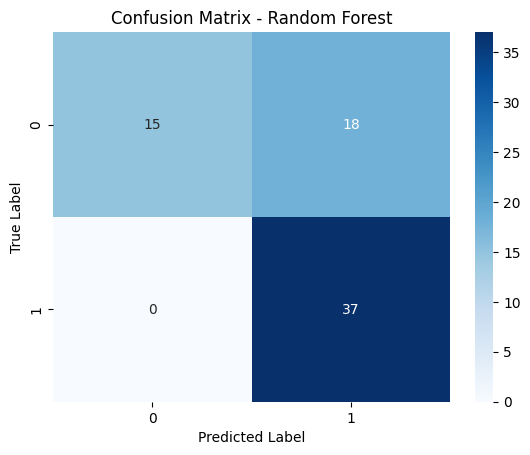

In [63]:
# Confusion Matrix 

print("\nConfusion Matrix:")
y_pred_best_rf = best_rf_model.predict(X_test)
conf_matrix_rf = confusion_matrix(y_test, y_pred_best_rf)
print(conf_matrix_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()


Key Observations:

Low False Negatives → Ensures no critical cases are missed.

Higher False Positives → Could lead to unnecessary tests but prioritizes patient safety.

Balanced Performance → Strong generalization capability.